<a href="https://colab.research.google.com/github/efthymios19/HYDRUS_GoogleColab/blob/main/Examples/Hydrus_example_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Install Fortran compiler
!apt-get update -qq
!apt-get install -y gfortran make

# Step 2: Clone the HYDRUS Fortran source code repository
!rm -rf /content/source_code
!git clone https://github.com/phydrus/source_code.git
%cd /content/source_code/source

# Step 3: Compile HYDRUS using gfortran
!gfortran -O2 -o hydrus HYDRUS.FOR INPUT.FOR HYSTER.FOR MATERIAL.FOR OUTPUT.FOR SINK.FOR SOLUTE.FOR TEMPER.FOR TIME.FOR WATFLOW.FOR

# Step 4: Verify the executable was created
!ls -l hydrus
!file hydrus


### HYDRUS 1 example

In [ ]:
!rm -rf /content/HYDRUS_GoogleColab
# Clone the repository
!git clone https://github.com/efthymios19/HYDRUS_GoogleColab.git

# Make the hydrus file executable
!chmod +x /content/HYDRUS_GoogleColab/bin/hydrus_1

# To avoid some Google Colab unconvenients
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)



Cloning into 'HYDRUS_GoogleColab'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 42 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (42/42), 753.33 KiB | 6.79 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [ ]:
!pip install phydrus

In [ ]:
import os
import phydrus as ps
%matplotlib inline

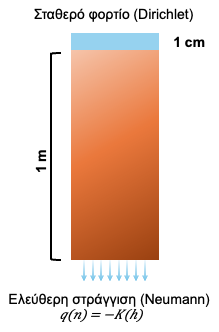

In [ ]:
# Folder for Hydrus files to be stored
ws = '/content/HYDRUS_GoogleColab/modelFiles' #use particular names
exe = '/content/HYDRUS_GoogleColab/bin/hydrus_1'
# Description
desc = "Infiltration of Water into a Single-Layered Soil Profile"
# Create model
ml = ps.Model(exe_name=exe, ws_name=ws, name="model", description=desc, mass_units="mmol",
              time_unit="days", length_unit="cm")
ml.basic_info["lFlux"] = True
ml.basic_info["lShort"] = False

ml.add_time_info(tmax=1, print_times=True, nsteps=12, dt=0.001)



INFO: Directory /content/HYDRUS_GoogleColab/modelFiles created
INFO:phydrus.model:Directory /content/HYDRUS_GoogleColab/modelFiles created


array([0.08333333, 0.16666667, 0.25      , 0.33333333, 0.41666667,
       0.5       , 0.58333333, 0.66666667, 0.75      , 0.83333333,
       0.91666667, 1.        ])

In [ ]:
ml.add_waterflow(top_bc=0, bot_bc=4)

m = ml.get_empty_material_df(n=1)
m.loc[[1]] = [[0.078, 0.43, 0.036, 1.56, 24.96, 0.5]]
ml.add_material(m)



In [ ]:
elements = 100  # Disctretize soil column into n elements
depth = -100  # Depth of the soil column
ihead = -100  # Determine initial Pressure Head
# Create Profile
profile = ps.create_profile(bot=depth, dx=abs(depth / elements), h=ihead)
profile.iloc[0, 1] = 1  # Define initial Pressure Head at the surface
ml.add_profile(profile)  # Add the profile

In [ ]:
# Add observation nodes at depth
ml.add_obs_nodes([-20, -40, -60, -80, -100])



In [ ]:
ml.write_input()
ml.simulate()



INFO: Successfully wrote /content/HYDRUS_GoogleColab/modelFiles/SELECTOR.IN
INFO:phydrus.model:Successfully wrote /content/HYDRUS_GoogleColab/modelFiles/SELECTOR.IN
INFO: Successfully wrote /content/HYDRUS_GoogleColab/modelFiles/PROFILE.DAT
INFO:phydrus.model:Successfully wrote /content/HYDRUS_GoogleColab/modelFiles/PROFILE.DAT
INFO: Hydrus-1D Simulation Successful.
INFO:phydrus.model:Hydrus-1D Simulation Successful.


CompletedProcess(args=['/content/HYDRUS_GoogleColab/bin/hydrus_1', '/content/HYDRUS_GoogleColab/modelFiles', '-1'], returncode=0)

/usr/local/lib/python3.11/dist-packages/phydrus/read.py:259: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df1 = read_csv(path, skiprows=start, index_col=0, nrows=end - start - 1,


<Axes: xlabel='Time [days]', ylabel='h'>

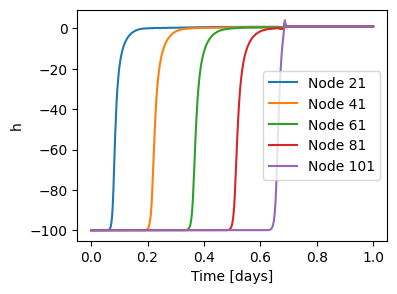

In [ ]:
ml.plots.obs_points()



/usr/local/lib/python3.11/dist-packages/phydrus/read.py:320: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data[time] = read_csv(file, skiprows=s,
/usr/local/lib/python3.11/dist-packages/phydrus/read.py:320: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data[time] = read_csv(file, skiprows=s,
/usr/local/lib/python3.11/dist-packages/phydrus/read.py:320: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data[time] = read_csv(file, skiprows=s,
/usr/local/lib/python3.11/dist-packages/phydrus/read.py:320: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data[time] = read_csv(file, skiprows=s,
/usr/local/lib/pytho

<Axes: xlabel='h [cm]', ylabel='Depth [cm]'>

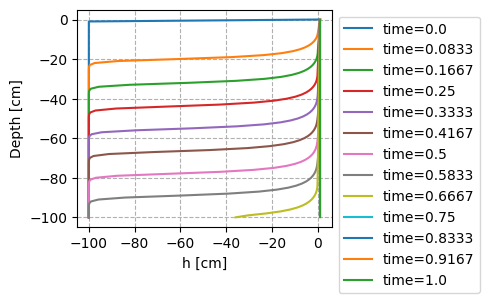

In [ ]:
ml.plots.profile_information()

/usr/local/lib/python3.11/dist-packages/phydrus/read.py:320: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data[time] = read_csv(file, skiprows=s,
/usr/local/lib/python3.11/dist-packages/phydrus/read.py:320: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data[time] = read_csv(file, skiprows=s,
/usr/local/lib/python3.11/dist-packages/phydrus/read.py:320: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data[time] = read_csv(file, skiprows=s,
/usr/local/lib/python3.11/dist-packages/phydrus/read.py:320: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data[time] = read_csv(file, skiprows=s,
/usr/local/lib/pytho

<Axes: xlabel='Theta [-]', ylabel='Depth [cm]'>

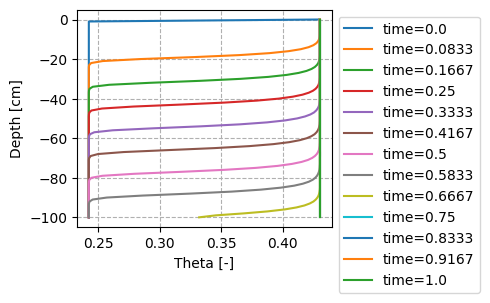

In [ ]:
ml.plots.profile_information("Water Content")



/usr/local/lib/python3.11/dist-packages/phydrus/read.py:214: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = read_csv(file, skiprows=s, nrows=e - s - 2, usecols=usecols,
/usr/local/lib/python3.11/dist-packages/phydrus/read.py:219: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.drop(index=data.index[0]).apply(to_numeric,


array([<Axes: xlabel='Time [days]', ylabel='Actual Surface Flux'>,
       <Axes: xlabel='Time [days]', ylabel='Cum. Actual Surface Flux'>],
      dtype=object)

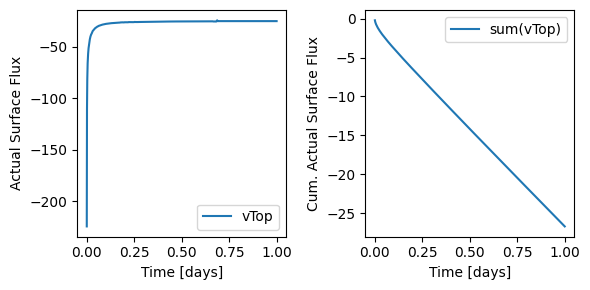

In [ ]:
ml.plots.water_flow("Actual Surface Flux")



/usr/local/lib/python3.11/dist-packages/phydrus/read.py:214: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = read_csv(file, skiprows=s, nrows=e - s - 2, usecols=usecols,
/usr/local/lib/python3.11/dist-packages/phydrus/read.py:219: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.drop(index=data.index[0]).apply(to_numeric,


array([<Axes: xlabel='Time [days]', ylabel='Bottom Flux'>,
       <Axes: xlabel='Time [days]', ylabel='Cum. Bottom Flux'>],
      dtype=object)

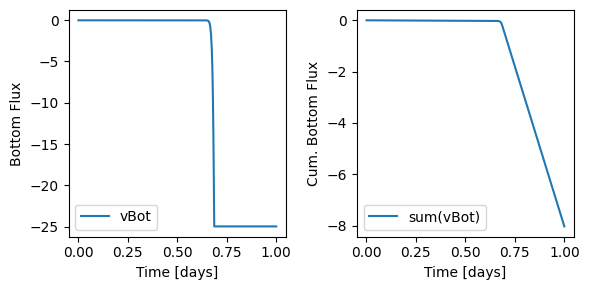

In [ ]:
ml.plots.water_flow(data="Bottom Flux")

/usr/local/lib/python3.11/dist-packages/phydrus/read.py:99: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data[i] = read_csv(file, skiprows=start + 1, nrows=nrows,


array([<Axes: xlabel='h', ylabel='theta'>, <Axes: xlabel='log_h'>],
      dtype=object)

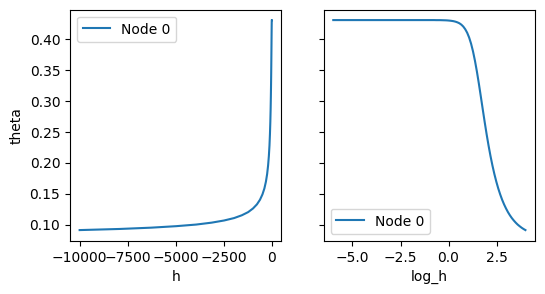

In [ ]:
ml.plots.soil_properties()



/usr/local/lib/python3.11/dist-packages/phydrus/read.py:99: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data[i] = read_csv(file, skiprows=start + 1, nrows=nrows,


array([<Axes: xlabel='h', ylabel='K'>, <Axes: xlabel='log_h'>],
      dtype=object)

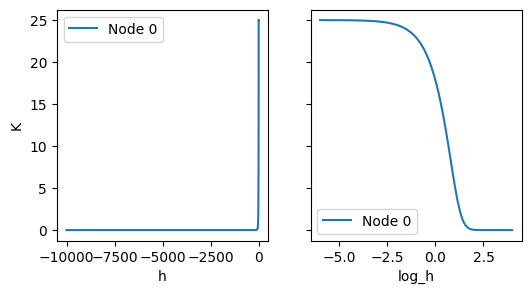

In [ ]:
ml.plots.soil_properties(data='Hydraulic Conductivity')